In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv('../exercicio4/fcc-forum-pageviews.csv')
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [11]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

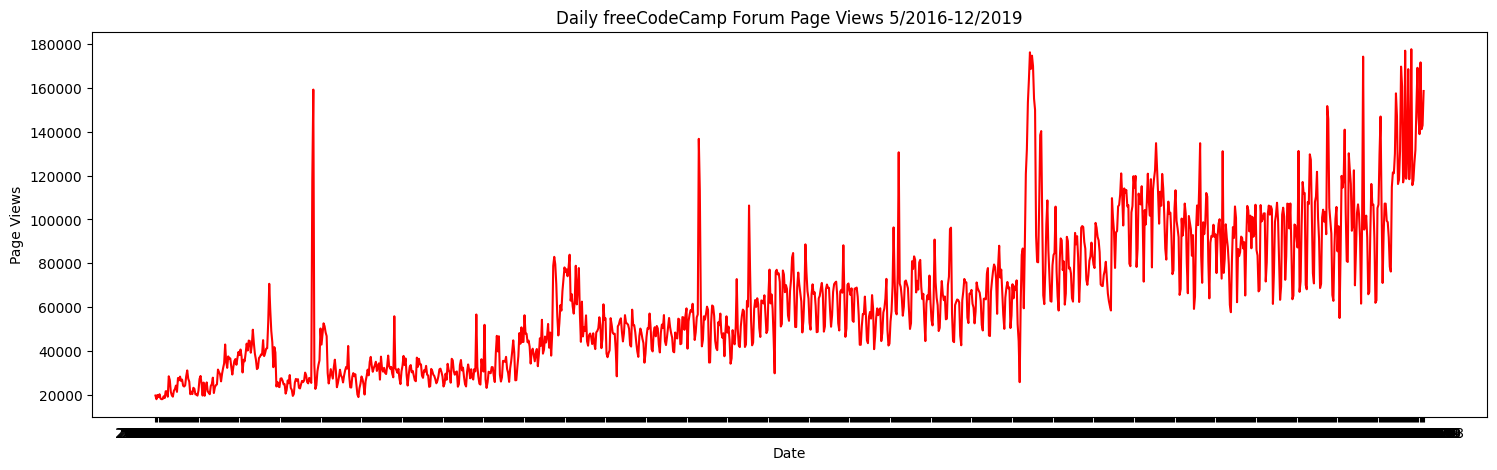

In [39]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    plt.figure(figsize=(18, 5))
    plt.plot(df.index, df['value'], color='red', linestyle='-') 
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

draw_line_plot()
